In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt


categ_table = pd.DataFrame(dict(names=['Peter', 'Jack', 'Eelin', 'John'],
                                vals1=[259, 83, 123, 162],
                                vals2=[159, 183, 23, 262],
                                vals3=[85, 48, 83, 67]))
categ_table = categ_table.set_index(
    'names').sort_values(by='vals1', ascending=False)

df_rowsum = categ_table.apply(lambda x: x.sum(), axis=1)

N = len(categ_table.index)
ndeep = 10
Width = 1
mydata = pd.DataFrame(columns=["x", "y", "type"])
j = 0
for i in df_rowsum.index:
    print(i)
    x = 300
    a = np.arange(1, ndeep+1, 1)
    b = np.arange(1, np.ceil(x/ndeep)+1, 1)
    X, Y = np.meshgrid(a, b)
    df_grid = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})

    Num = (categ_table.loc[i, :]/df_rowsum[i]*x).map(lambda x: int(np.ceil(x)))
    category = np.repeat(categ_table.columns, Num)

    df_grid = df_grid.loc[np.arange(0, x), :]
    df_grid['x'] = df_grid['x']+j*ndeep+j*Width
    j = j+1
    df_grid['type'] = category[np.arange(0, x)]
    mydata = mydata.append(df_grid)


mydata['type'] = pd.Categorical(mydata['type'], categories=categ_table.columns, ordered=True)
mydata['x'] = mydata['x'].astype(float)
x_breaks = (np.arange(0, N)+1)*ndeep+np.arange(0, N)*Width-ndeep/2
x_label = df_rowsum.index

mydata


Peter
John
Eelin
Jack


,x,y,type
0,1.0,1.0,vals1
1,2.0,1.0,vals1
2,3.0,1.0,vals1
3,4.0,1.0,vals1
4,5.0,1.0,vals1
...,...,...,...
295,39.0,30.0,vals3
296,40.0,30.0,vals3
297,41.0,30.0,vals3
298,42.0,30.0,vals3


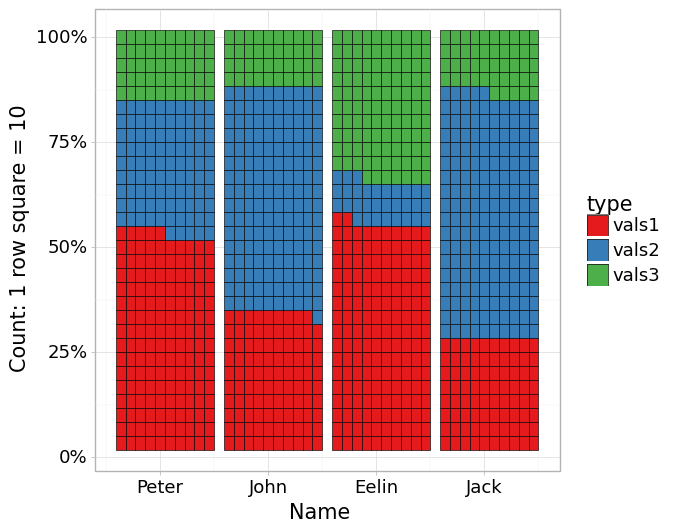

<ggplot: (150886763927)>


In [2]:
base_plot = (ggplot() +
             geom_tile(aes(x='x', y='y', fill='type'), mydata, color="k", size=0.25) +
             scale_fill_brewer(type='qual', palette="Set1") +
             xlab("Name") +
             ylab("Count: 1 row square = " + str(ndeep)) +
             scale_x_continuous(breaks=x_breaks, labels=x_label) +
             scale_y_continuous(breaks=np.linspace(0, x/10, 5), labels=["0%", "25%", "50%", "75%", "100%"]) +
             theme_light() +
             theme(axis_title=element_text(size=15, face="plain", color="black"),
                   axis_text=element_text(
                       size=13, face="plain", color="black"),
                   legend_text=element_text(
                       size=13, face="plain", color="black"),
                   legend_title=element_text(
                       size=15, face="plain", color="black"),
                   legend_background=element_blank(),
                   legend_position="right",
                   figure_size=(6, 6),
                   dpi=100))
print(base_plot)


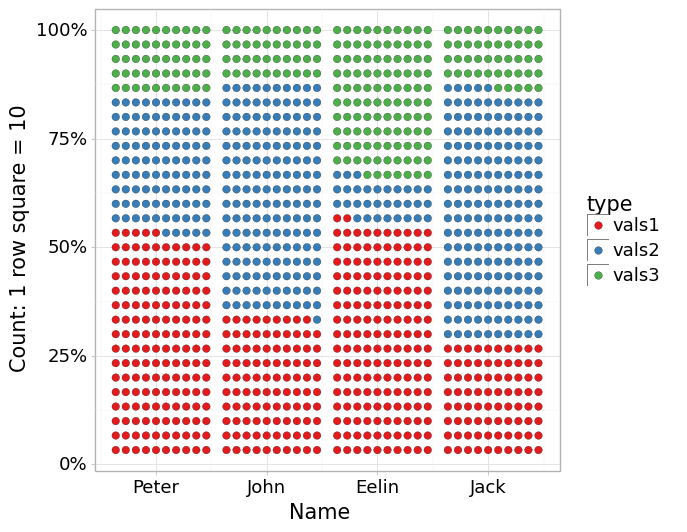

<ggplot: (150887428081)>


In [3]:
base_plot = (ggplot() +
             # The color of the lines between tiles
             geom_point(aes(x='x', y='y', fill='type'), mydata, shape='o', color="k", size=3, stroke=0.1) +
             # geom_text(aes(x='x',y='y',label='label'),data=mydata_label,size=13) + # The color of the lines between tiles
             scale_fill_brewer(type='qual', palette="Set1") +
             xlab("Name") +
             ylab("Count: 1 row square = " + str(ndeep)) +
             scale_x_continuous(breaks=x_breaks, labels=x_label) +
             scale_y_continuous(breaks=np.linspace(0, x/10, 5), labels=["0%", "25%", "50%", "75%", "100%"]) +
             theme_light() +
             theme(axis_title=element_text(size=15, face="plain", color="black"),
                   axis_text=element_text(
                       size=13, face="plain", color="black"),
                   legend_text=element_text(
                       size=13, face="plain", color="black"),
                   legend_title=element_text(
                       size=15, face="plain", color="black"),
                   legend_background=element_blank(),
                   legend_position="right",
                   figure_size=(6, 6),
                   dpi=100)
             )
print(base_plot)
